#### Import các thư viện

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Load data train và test

In [19]:
train_df=pd.read_csv("F:\\DS\\Code\\data_water.csv")
test_df=pd.read_csv("F:\\DS\\Code\\data_water_test.csv")

In [20]:
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


#### Thống kê mô tả

In [21]:
train_df.describe().T.style.background_gradient(axis=1,cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
ph,2234.000000,7.071024,1.588089,0.000000,6.089577,7.022285,8.035837,14.000000
Hardness,2620.000000,196.200911,33.137494,47.432000,176.734160,196.926487,216.657847,323.124000
Solids,2620.000000,21973.377381,8702.501618,728.750830,15715.740730,20926.882155,27216.632550,61227.196008
Chloramines,2620.000000,7.130793,1.584109,0.352000,6.125502,7.131972,8.105680,13.127000
Sulfate,1999.000000,334.040923,41.573027,129.000000,307.992545,333.073546,360.601377,481.030642
Conductivity,2620.000000,425.749573,81.038498,181.483754,365.842780,421.884968,481.089353,753.342620
Organic_carbon,2620.000000,14.292469,3.272972,2.200000,12.067417,14.220645,16.541731,27.006707
Trihalomethanes,2495.000000,66.194111,16.186110,0.738000,55.711220,66.299162,77.127254,124.000000
Turbidity,2620.000000,3.965649,0.783198,1.450000,3.441806,3.962234,4.497554,6.739000
Potability,2620.000000,0.394275,0.488788,0.000000,0.000000,0.000000,1.000000,1.000000


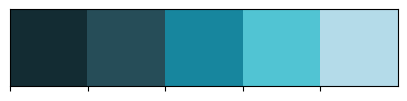

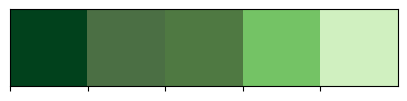

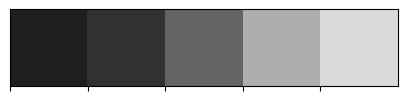

In [22]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

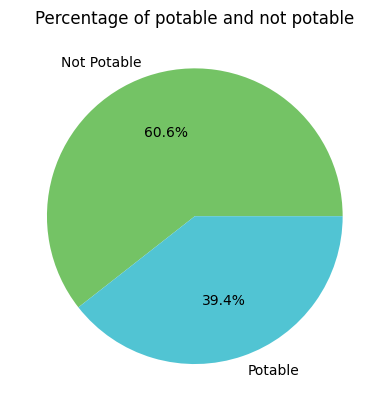

In [23]:
x_0 = train_df.loc[train_df['Potability']==0].shape[0]
x_1 = train_df.loc[train_df['Potability']==1].shape[0]
plt.pie(np.array([x_0,x_1]),labels=['Not Potable','Potable'],colors=[colors_green[3], colors_blue[3]],autopct='%1.1f%%')
plt.color_discrete_sequence=[colors_green[3], colors_blue[3]]
plt.title('Percentage of potable and not potable');

#### Phân tích tương quan

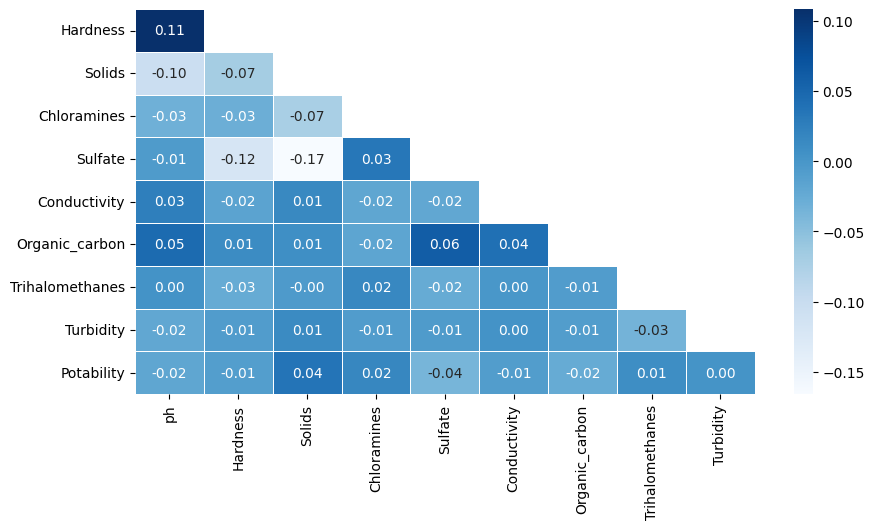

In [24]:
data_corr = train_df.corr()
one_corr = np.ones_like(data_corr,dtype=bool)
mask = np.triu(one_corr)
adjusted_mask = mask[1:, :-1]
adjusted_data_corr = data_corr.iloc[1:, :-1]
plt.figure(figsize=(10, 5))
sns.heatmap(adjusted_data_corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask= adjusted_mask , cmap='Blues')
plt.show()

* Nhận thấy các biến dường như không có sự tương quan với nhau

#### Biểu đồ boxplot của các biến quan sát

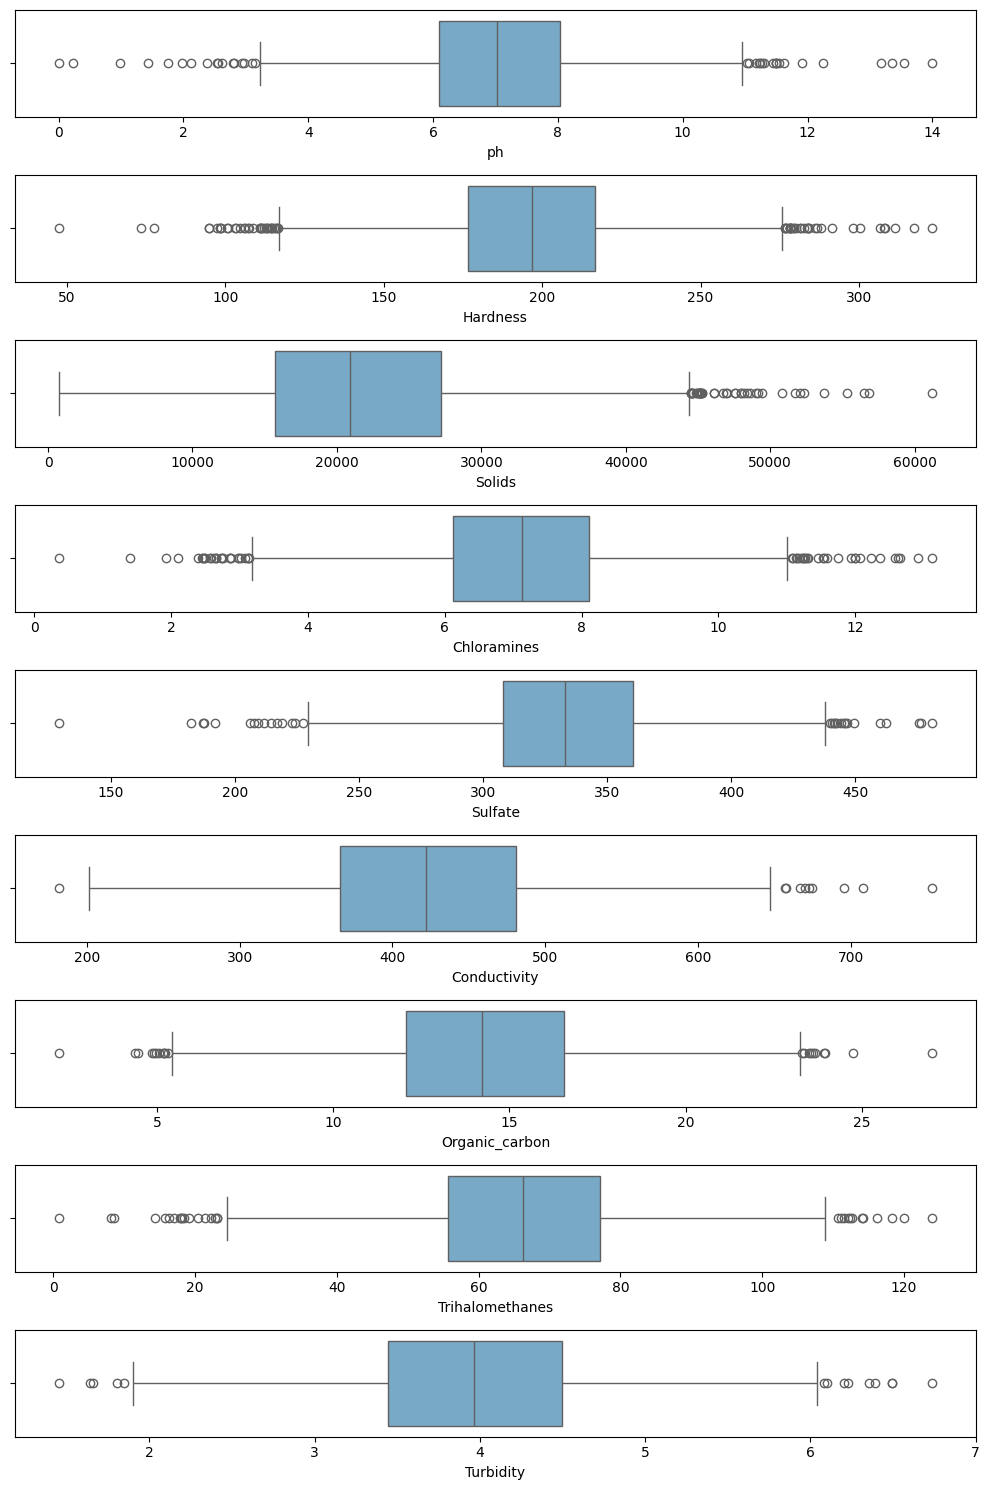

In [25]:
cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
n_rows =9
n_cols = 1

fig,ax = plt.subplots(n_rows,n_cols,figsize=(10,15))
for c in range(n_rows):  
    ax_i = ax[c]
    sns.boxplot(data=train_df,x=train_df[cols[c]],palette='Blues',ax=ax_i,)
plt.tight_layout()

#### Xử lí missing value 

In [26]:
features_cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
def missing_count (df,list_m):
    
    for col in features_cols:
        rows = df.shape[0]
        missing_value = df[col].isnull().sum()
        if missing_value >0:
            list_m.append(f'Column {col} has {missing_value/rows*100 :.2f}% missing value ')
    return list_m
print('Training data:')
for i in missing_count(train_df,[]):
    print(i)
print('----------------')
print('Test data:')
for i in missing_count(test_df,[]):
    print(i)

Training data:
Column ph has 14.73% missing value 
Column Sulfate has 23.70% missing value 
Column Trihalomethanes has 4.77% missing value 
----------------
Test data:
Column ph has 16.01% missing value 
Column Sulfate has 24.39% missing value 
Column Trihalomethanes has 5.64% missing value 


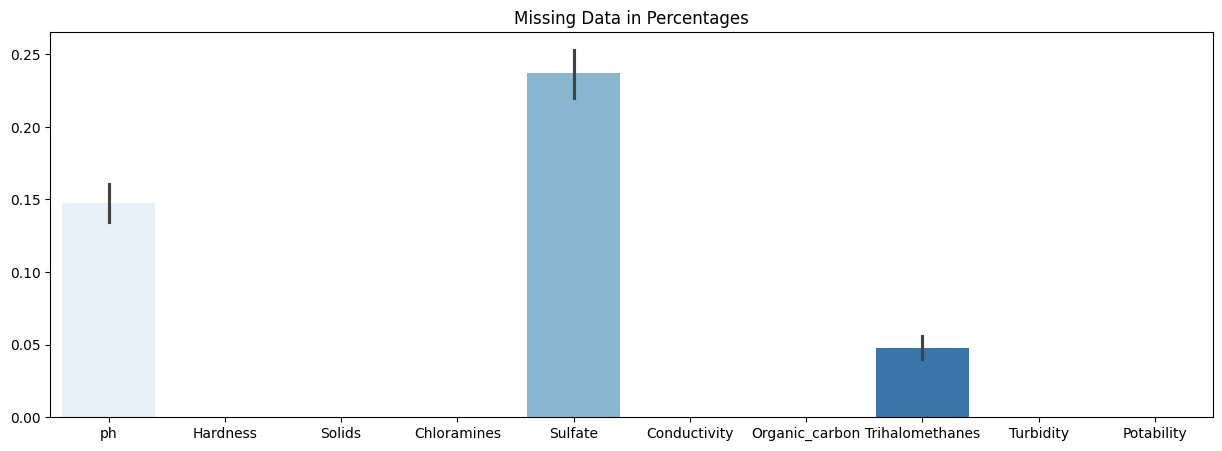

In [27]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=train_df.isnull(),palette='Blues');
ax.set_title('Missing Data in Percentages');


In [28]:
# xử lí traning data
dataset=train_df.copy()
# với mỗi cột có giá trị null, cột sẽ chia thành 2 tập ( có Potability = 0 và Potability = 1), 
# sau đó tính median mỗi cột, giá trị khuyết sẽ được thay bằng median của 1 trong 2 tập dựa theo Potability (0 hoặc 1 )

# cột ph
phMedian_0 = dataset[dataset['Potability'] == 0]['ph'].median(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['ph'].isna()), 'ph'] = phMedian_0
phMedian_1 = dataset[dataset['Potability'] == 1]['ph'].median(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['ph'].isna()), 'ph'] = phMedian_1
# cột Sulfate
SulfateMedian_0 = dataset[dataset['Potability'] == 0]['Sulfate'].median(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['Sulfate'].isna()), 'Sulfate'] = SulfateMedian_0
SulfateMedian_1 = dataset[dataset['Potability'] == 1]['Sulfate'].median(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['Sulfate'].isna()), 'Sulfate'] = SulfateMedian_1
# cột Trihalomethanes
TrihalomethanesMedian_0 = dataset[dataset['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMedian_0
TrihalomethanesMedian_1 = dataset[dataset['Potability'] == 1]['Trihalomethanes'].median(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMedian_1

train_df = dataset.copy()

In [29]:
# giá trị null sẽ được thay bằng median của mỗi cột tương ứng

from sklearn.impute import SimpleImputer
ip = SimpleImputer(missing_values=np.nan,strategy='median')
ip.fit(test_df.iloc[:,:-1])
# xử lí tất các các cột trừ cột cuối cùng (id)
test_df.iloc[:,:-1]=ip.transform(test_df.iloc[:,:-1])

#### Xử lí outlier

In [30]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

# tìm ranh giới của boxplot
def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Tìm giá trị max và min trong boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

# đưa dữ liệu ngoại lệ (outlier) về giá trị max hoặc min của boxplot
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [31]:
features_cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in features_cols:
    train_df[col] = BoxplotOutlierClipper().fit_transform(train_df[col])
    test_df[col] = BoxplotOutlierClipper().fit_transform(test_df[col])

#### Dùng thuật toán K-Fold đánh giá các mô hình phân lớp

In [32]:
features_cols=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
X=train_df[features_cols]
y=train_df['Potability']

In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

seed =42
models =[
    SVC(random_state=2024),
    KNeighborsClassifier(metric='minkowski',p=2),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=seed)
]

In [34]:
# Đánh giá các mô hình và cho ra số điểm trung bình (accuracy) và sai sô
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models,X,y,metrics,cv=5,plot_results=False):
    kfold=StratifiedKFold(cv,shuffle=True,random_state=2024)
    entries =[]
    for model in models:
        model_name=model.__class__.__name__
        scores=cross_val_score(model,X,y,scoring=metrics,cv=kfold)
        for fold_idx,score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
        
    cv_df=pd.DataFrame(entries,columns=['model_name','fold_id','accuracy_score'])

    if plot_results :
        sns.boxplot(x='model_name',y='accuracy_score',data=cv_df,color='lightblue',showmeans=True)
        plt.title('Boxplot of Baseline')
        plt.xticks(rotation=45)

    mean=cv_df.groupby('model_name')['accuracy_score'].mean()
    std=cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results=pd.concat([mean,std],axis=1,ignore_index=True)
    baseline_results.columns=['Mean','Standard Deviation']

    baseline_results.sort_values(by=['Mean'],ascending=False,inplace=True)
    return baseline_results

generate_baseline_results(models,X,y,metrics='accuracy',cv=5,plot_results=False)



,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.781298,0.019396
XGBClassifier,0.762214,0.009212
DecisionTreeClassifier,0.700382,0.029932
SVC,0.605725,0.001045
KNeighborsClassifier,0.553053,0.032482


#### Chạy 3 mô hình có số điểm cao nhất

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2,random_state= 42)
X_test = test_df.iloc[:,:-1]

In [36]:
from sklearn.metrics import precision_score,confusion_matrix

In [37]:
rfc = RandomForestClassifier(random_state=seed)
rfc.fit(X_train,y_train)
dt =DecisionTreeClassifier(random_state=seed)
dt.fit(X_train,y_train)
xgb =XGBClassifier()
xgb.fit(X_train,y_train)
print(f"{'Precision':>34}", '  Recall')
# (TN, FP, FN, TP)

rfc_confusion = confusion_matrix(y_val,rfc.predict(X_val)).ravel()
dt_confusion = confusion_matrix(y_val,dt.predict(X_val)).ravel()
xgb_confusion = confusion_matrix(y_val,rfc.predict(X_val)).ravel()
print('RandomForestClassifier  ',f'{precision_score(y_val,rfc.predict(X_val)):.2f}',f"{(f'{(rfc_confusion[0] / (rfc_confusion[0]+rfc_confusion[1])):.2f}'): >11}")
print('DecisionTreeClassifier  ',f'{precision_score(y_val,xgb.predict(X_val)):.2f}',f"{(f'{xgb_confusion[0] / (xgb_confusion[0]+xgb_confusion[1]):.2f}'): >11}")
print('XGBClassifier           ',f'{precision_score(y_val,dt.predict(X_val)):.2f}',f"{(f'{dt_confusion[0] / (dt_confusion[0]+dt_confusion[1]):.2f}'): >11}")




                         Precision   Recall
RandomForestClassifier   0.75        0.88
DecisionTreeClassifier   0.73        0.88
XGBClassifier            0.66        0.81


In [38]:
predic_y = rfc.predict(X_test)

In [39]:
submissionfile = pd.DataFrame({'id':test_df['id'],'Potability':predic_y})

In [40]:
submissionfile.to_csv('submissionfile.csv')